In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
import joblib

In [2]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")

In [3]:
df1 = pd.read_excel("gesture_data 1.xlsx")
df2 = pd.read_excel("gesture_data 2.xlsx")
df = pd.concat([df1, df2], axis = 0)

In [4]:
df

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16,Feature17,Feature18,Feature19,Feature20,Feature21,Feature22,Feature23,Label
0,0.076388,0.158806,0.232667,0.288418,0.198464,0.227310,0.166020,0.160309,0.179769,0.220996,0.136998,0.142707,0.166735,0.205202,0.129607,0.127410,0.164636,0.192859,0.142995,0.138249,0.033493,1.788137,0.971331,a
1,0.076154,0.158351,0.231772,0.287979,0.199100,0.227427,0.166310,0.161239,0.180097,0.220972,0.137148,0.143609,0.166846,0.205240,0.130374,0.129009,0.164954,0.193364,0.144306,0.140267,0.033523,1.793404,0.957556,a
2,0.076077,0.158071,0.231271,0.287342,0.197549,0.226943,0.165393,0.158498,0.179266,0.220407,0.136282,0.141644,0.166702,0.204879,0.129026,0.127045,0.164897,0.193092,0.142672,0.137663,0.033022,1.766853,1.006581,a
3,0.077156,0.158295,0.231758,0.288523,0.199301,0.228134,0.166873,0.160526,0.180724,0.221099,0.136970,0.143319,0.168090,0.205210,0.130302,0.129370,0.166361,0.194011,0.144483,0.139878,0.033864,1.769206,0.980955,a
4,0.076859,0.158696,0.232443,0.288353,0.197662,0.227696,0.167524,0.161316,0.178997,0.220655,0.137488,0.142866,0.166513,0.205039,0.130561,0.128200,0.164769,0.193700,0.144763,0.139725,0.034142,1.783549,0.946175,a
5,0.075771,0.158343,0.231585,0.286386,0.196266,0.226924,0.165481,0.158749,0.177801,0.220134,0.136779,0.141747,0.165238,0.204322,0.129336,0.126678,0.163808,0.192128,0.142393,0.137447,0.033512,1.757769,1.007549,a
6,0.076070,0.158297,0.231051,0.286640,0.196078,0.225977,0.164570,0.157581,0.178107,0.219457,0.136569,0.141166,0.165847,0.203443,0.129168,0.127609,0.164539,0.191310,0.141374,0.137264,0.033378,1.749573,0.984153,a
7,0.076048,0.158602,0.231650,0.287183,0.197073,0.226000,0.164157,0.158367,0.179034,0.219672,0.136364,0.142201,0.166555,0.203944,0.129263,0.128341,0.165160,0.191641,0.141819,0.138445,0.033359,1.766775,1.002098,a
8,0.078477,0.160043,0.233458,0.290007,0.199453,0.228173,0.167170,0.161828,0.180626,0.221316,0.137734,0.144078,0.167828,0.204894,0.130050,0.129439,0.165776,0.192503,0.143314,0.139794,0.034090,1.772669,0.950624,a
9,0.076061,0.158532,0.231853,0.287836,0.198728,0.227912,0.165453,0.158358,0.180040,0.220943,0.135531,0.141602,0.167057,0.206073,0.130253,0.127981,0.165095,0.192912,0.142933,0.138072,0.033297,1.755961,1.010072,a


In [5]:
df.dropna(axis = 0, inplace = True)

In [6]:
x = df.iloc[:, :23]
y = df.iloc[:, 23:]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)

In [8]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
y_hat = classifier.predict(x_test)

In [10]:
accuracy = accuracy_score(y_test, y_hat)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


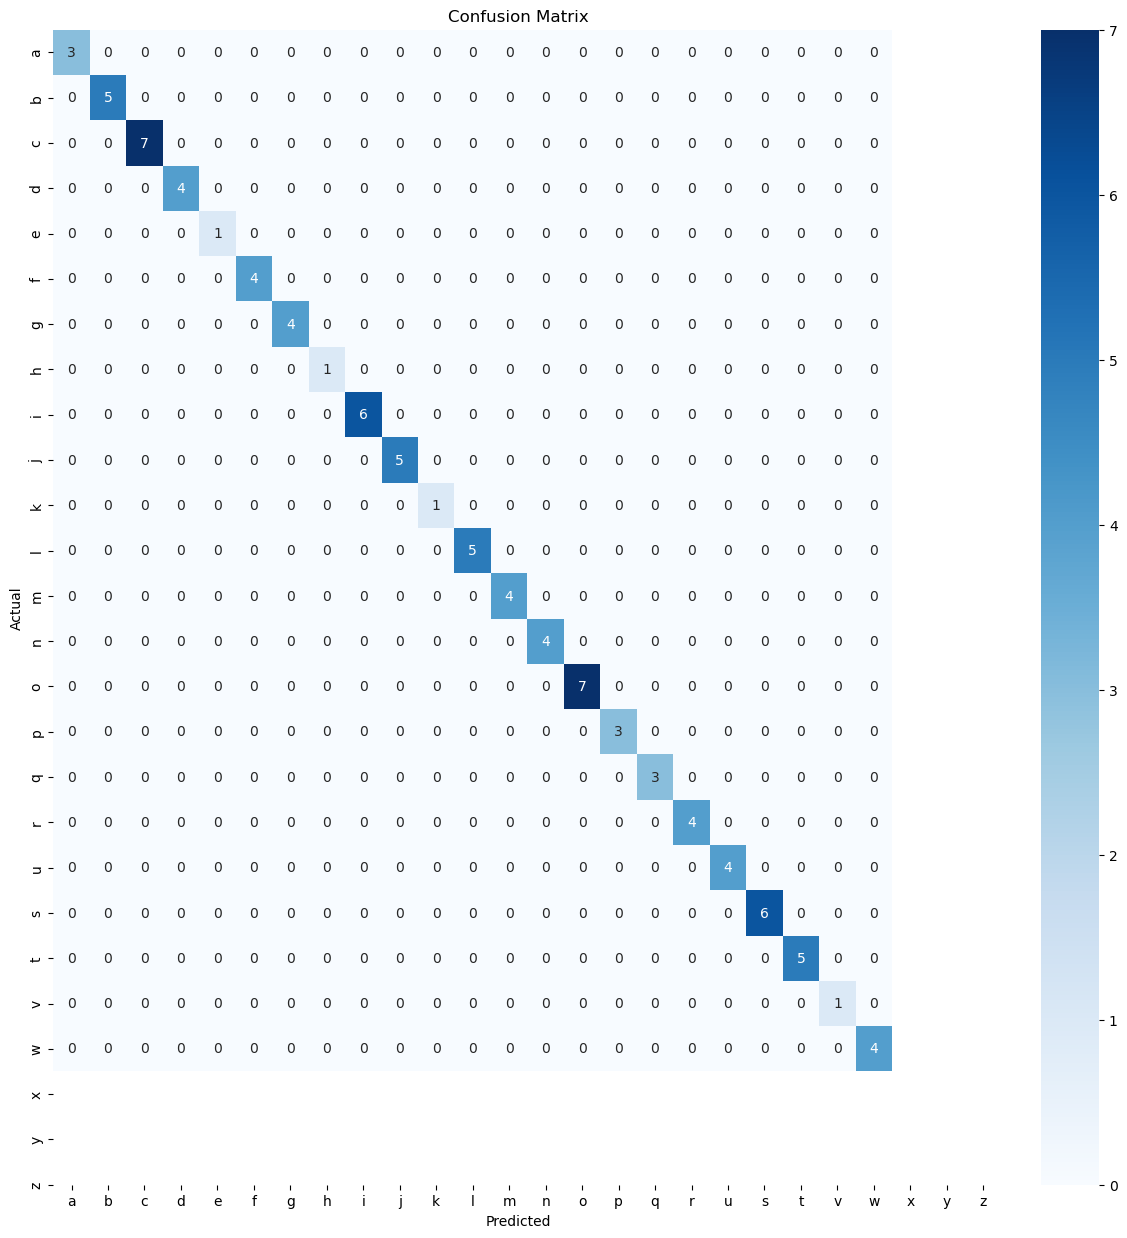

In [11]:
cm = confusion_matrix(y_test, y_hat)

plt.figure(figsize = (15, 15))
sns.heatmap(cm, annot = True, fmt = "d", cmap= "Blues", xticklabels = df["Label"].unique(), yticklabels = df["Label"].unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [12]:
joblib.dump(classifier, 'gesture recognition model.pkl')

['gesture recognition model.pkl']

In [13]:
y.value_counts().reset_index().sort_values("Label", ascending = True).reset_index(drop = True)

,Label,count
0,a,52
1,b,45
2,c,32
3,d,25
4,e,30
5,f,29
6,g,22
7,h,23
8,i,33
9,j,43


In [14]:
y["Label"].nunique()

26